# Lab 14 - Artificial Neural Networks
## Sam Bacon - April 12, 2021
### Using Artificial Neural Networks for Classification

In [ ]:
# import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
# read in data
data_csv = 'https://drive.google.com/uc?export=download&id=1ATf3eoCvAKG_I2luCV2gj_GRDUXoybFR'
titanic = pd.read_csv(data_csv)
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# create y and X
y = titanic['Survived']
X = titanic[['Pclass','Sex','SibSp','Parch','Fare','Age']]

In [ ]:
# one-hot encoding
X = pd.get_dummies(X)
X.head(5)

,Pclass,SibSp,Parch,Fare,Age,Sex_female,Sex_male
0,3,1,0,7.2500,22.0,0,1
1,1,1,0,71.2833,38.0,1,0
2,3,0,0,7.9250,26.0,1,0
3,1,1,0,53.1000,35.0,1,0
4,3,0,0,8.0500,35.0,0,1


In [ ]:
# missing values
X = X.fillna(X.mean())

In [ ]:
# splitting data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()

# fit only to training data
scaler.fit(Xtrain)

# now apply the transformations to the data
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [ ]:
# create neural network
mlp = MLPClassifier(hidden_layer_sizes=(2,1),
                    solver = 'sgd',
                    learning_rate_init = 0.0001,
                    activation = "tanh",
                    max_iter = 1500,
                    tol = 1e-5,
                    n_iter_no_change = 50,
                    verbose = False)

In [ ]:
# fit classifier to training data
mlp.fit(Xtrain, ytrain)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 1), learning_rate='constant',
              learning_rate_init=0.0001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=50, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# predict test data
y_pred = mlp.predict(Xtest)

In [ ]:
# classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


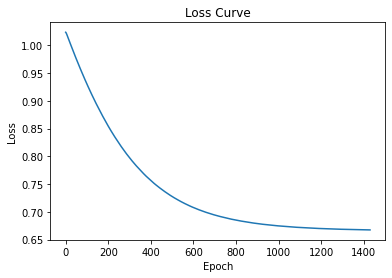

In [ ]:
# loss curve
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

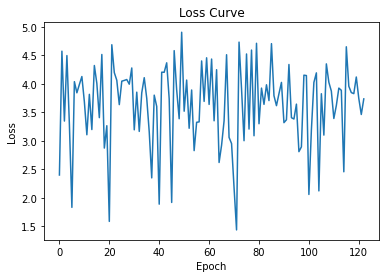

In [ ]:
# learning_rate_init = 10
mlp2 = MLPClassifier(hidden_layer_sizes=(2,1),
                    solver = 'sgd',
                    learning_rate_init = 10,
                    activation = "tanh",
                    max_iter = 1500,
                    tol = 1e-5,
                    n_iter_no_change = 50,
                    verbose = False)

# fit classifier to training data
mlp2.fit(Xtrain, ytrain)

# predict test data
y_pred2 = mlp2.predict(Xtest)

# loss curve
plt.plot(mlp2.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


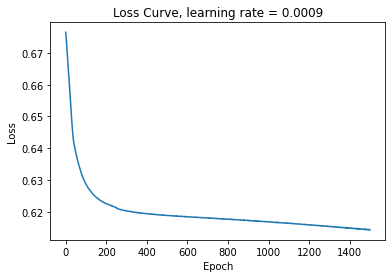

In [ ]:
# experimenting with learning rate...

mlp3 = MLPClassifier(hidden_layer_sizes=(2,1),
                      solver = 'sgd',
                      learning_rate_init = 0.0009,
                      activation = "tanh",
                      max_iter = 1500,
                      tol = 1e-5,
                      n_iter_no_change = 50,
                      verbose = False)

# fit classifier to training data
mlp3.fit(Xtrain, ytrain)

# predict test data
y_pred3 = mlp3.predict(Xtest)

# loss curve
plt.plot(mlp3.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve, learning rate = 0.0009')
plt.show()

In [ ]:
# experimenting with other parameters...

mlp4 = MLPClassifier(hidden_layer_sizes=(30,10),
                      solver = 'adam',
                      learning_rate_init = 0.0009,
                      activation = "tanh",
                      max_iter = 1500,
                      tol = 1e-5,
                      n_iter_no_change = 50,
                      verbose = False)

# fit classifier to training data
mlp4.fit(Xtrain, ytrain)

# predict test data
y_pred4 = mlp4.predict(Xtest)

print(classification_report(ytest, y_pred4))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Observations:

After experimenting with different values for node count, solver, and activation, the highest accuracy I was able to achieve was 0.83. This model had hidden_layer_sizes = (30,10), solver = 'adam', and activation = 'tanh'. I was also able to get slightly lower accuracies using the other activations and solvers. I also noticed that inreasing the hidden_layer_sizes value increased the accuracy to a certain point, but then it actually started to decrease the accuracy. The scikit website indicated that 'adam' was ideal for larger datasets, so I was somewhat surprised that it also worked well for the titanic dataset (only 891 observations).